### Toxicity classification using LSTM

In [268]:
#importing libraries
import sys, os, re, csv, codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [269]:
data = pd.read_csv("../data/1_set.csv")
test = pd.read_csv("../data/train_hate_offense_data.csv")

In [270]:
data.head(5)

,tweet,hate,offensive,ok
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0


In [271]:
data.isnull().any()

tweet        False
hate         False
offensive    False
ok           False
dtype: bool

In [272]:
test.head(5)

,comment_text,hate,offensive,ok
0,Explanation\nWhy the edits made under my usern...,0,0,1
1,D'aww! He matches this background colour I'm s...,0,0,1
2,"Hey man, I'm really not trying to edit war. It...",0,0,1
3,"""\nMore\nI can't make any real suggestions on ...",0,0,1
4,"You, sir, are my hero. Any chance you remember...",0,0,1


In [273]:
test.isnull().any()

comment_text    False
hate            False
offensive       False
ok              False
dtype: bool

In [274]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"rt", '',text)
    text = re.sub(r"\'ve","have", text)
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"\'re'","are", text)
    text = re.sub(r"\'d'","would",text)
    text = re.sub(r"\'ll'", "will", text)
    text = re.sub(r"\'scuse'", "excuse", text)
    text = re.sub("\W",' ', text)
    text = re.sub('\s+',' ',text)
    text = text.strip(' ')
    return text
data['tweet'] = data['tweet'].map(lambda x: clean_text(x))
test['comment_text'] = test['comment_text'].map(lambda x: clean_text(x))

In [275]:
list_classes = ['hate','offensive','ok']
y = data[list_classes].values
x = data['tweet']

In [276]:
y_test = test[list_classes].values
x_test = test['comment_text']

In [277]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x))
list_tokenized_x = tokenizer.texts_to_sequences(x)


#tokenizer.fit_on_texts(list(x))
list_tokenized_x_test = tokenizer.texts_to_sequences(x_test)

In [278]:
list_tokenized_x[:1]

[[19229,
  70,
  2,
  237,
  5,
  900,
  1353,
  52,
  3015,
  43,
  39,
  398,
  60,
  70,
  2,
  108,
  5,
  138,
  186,
  164,
  3,
  75,
  58]]

In [279]:
maxlen = 100

X_t = pad_sequences(list_tokenized_x, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_x_test, maxlen=maxlen)

In [280]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_x]

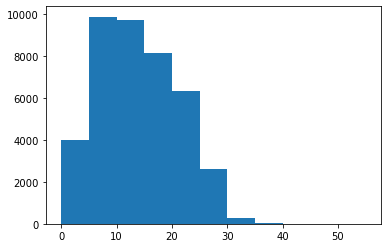

In [281]:
plt.hist(totalNumWords, bins= np.arange(0,60,5))
plt.show()

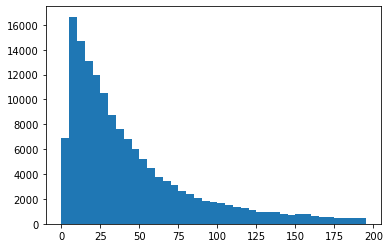

In [282]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_x_test]
plt.hist(totalNumWords, bins= np.arange(0,200,5))
plt.show()

## Start the model

In [283]:
inp = Input(shape=(maxlen,))#max_len=200 as defined earlier

In [285]:
def get_model():
    embed_size = 128
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(4, return_sequences=True, name='lstm_layer'))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.05)(x)
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.05)(x)
    x = Dense(10, activation='relu')(x)
    x = Dropout(0.05)(x)
    x = Dense(3, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
            optimizer = 'adam',
            metrics=['accuracy'])
    return model
    
model = get_model()
batch_size = 64
epochs = 2
model.fit(X_t, y, batch_size=batch_size, epochs=epochs, 
          validation_split=0.1)

Epoch 1/2
576/576 [==============================] - 38s 66ms/step - loss: 0.3107 - accuracy: 0.7824 - val_loss: 0.1683 - val_accuracy: 0.9812
Epoch 2/2
576/576 [==============================] - 38s 66ms/step - loss: 0.1836 - accuracy: 0.8451 - val_loss: 0.1590 - val_accuracy: 0.9790


In [216]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [217]:
x = LSTM(30, return_sequences=True, name='lstm_layer')(x)

In [218]:
x = GlobalMaxPool1D()(x)

In [219]:
x = Dropout(0.1)(x)

In [220]:
x = Dense(20, activation='relu')(x)

In [194]:
x = Dropout(0.1)(x)

In [221]:
x = Dense(3, activation='sigmoid')(x)

In [222]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
            optimizer = 'adam',
            metrics=['accuracy'])

In [223]:
batch_size = 128
epochs = 2
model.fit(X_t, y, batch_size=batch_size, epochs=epochs, 
          validation_split=0.1)

Epoch 1/2
288/288 [==============================] - 24s 85ms/step - loss: 0.4462 - accuracy: 0.6782 - val_loss: 0.2467 - val_accuracy: 0.9648
Epoch 2/2
288/288 [==============================] - 25s 86ms/step - loss: 0.2312 - accuracy: 0.8402 - val_loss: 0.1205 - val_accuracy: 0.9868


In [258]:
y_pred = model.predict([X_test], batch_size=1024,verbose=1)

156/156 [==============================] - 22s 140ms/step


In [231]:
y_pred = model.predict([X_test[159493:159494]], batch_size=1024,verbose=1)
y_pred

1/1 [==============================] - 0s 903us/step


array([[0.24713832, 0.9858172 , 0.03004849]], dtype=float32)

In [230]:
test['comment_text'][159493]
#X_test[7]

'fucking faggot lolwat'

In [259]:

severe_toxic = pd.DataFrame({'y_pred':y_pred[:,0],'y_test':y_test[:,0]})
severe_toxic

,y_pred,y_test
0,0.130933,0
1,0.082797,0
2,0.129794,0
3,0.261915,0
4,0.071690,0
...,...,...
159566,0.216203,0
159567,0.113778,0
159568,0.081303,0
159569,0.077138,0


In [260]:
severe_toxic.y_pred = (severe_toxic.y_pred  > 0.4) 

In [261]:
severe_toxic

,y_pred,y_test
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0
...,...,...
159566,False,0
159567,False,0
159568,False,0
159569,False,0


In [262]:
pd.crosstab(severe_toxic.y_pred,severe_toxic.y_test)

y_test,0,1
y_pred,,
False,139559,8339
True,11123,550


In [263]:
toxic = pd.DataFrame({'y_pred':y_pred[:,1],'y_test':y_test[:,1]})#,'Y_test':y_test})
toxic.y_pred = (toxic.y_pred > 0.6) 

In [264]:
pd.crosstab(toxic.y_pred,toxic.y_test)

y_test,0,1
y_pred,,
False,136516,9136
True,6830,7089


In [239]:
toxic.y_pred.unique()

array([False,  True])

In [240]:
pred_results =pd.DataFrame({'y_test':y_test[:,0]})#,'Y_test':y_test})

In [241]:
from sklearn import metrics

#print(metrics.confusion_matrix(y_test,np.argmax(y_pred, axis=1)))

In [242]:
metrics.accuracy_score(y_test, y_pred.round(), normalize=True)

0.8195536782999417

In [265]:
  for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

In [266]:
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      8889
           1     0.6638    0.3970    0.4969     16225
           2     0.9347    0.9772    0.9555    143346

   micro avg     0.9182    0.8698    0.8934    168460
   macro avg     0.5328    0.4581    0.4841    168460
weighted avg     0.8593    0.8698    0.8609    168460
 samples avg     0.9182    0.9017    0.9072    168460



/home/farzaneh/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.metrics import classification_report